In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/academic-stress-level-maintenance-dataset/academic Stress level - maintainance 1.csv


In [2]:
df = pd.read_csv("/kaggle/input/academic-stress-level-maintenance-dataset/academic Stress level - maintainance 1.csv")
df

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
...,...,...,...,...,...,...,...,...,...
135,17/08/2025 13:02:04,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,3,4
136,18/08/2025 14:36:00,undergraduate,4,2,disrupted,Analyze the situation and handle it with intel...,No,3,3
137,18/08/2025 17:13:52,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,2,4
138,18/08/2025 19:08:52,undergraduate,4,5,disrupted,"Social support (friends, family)",No,5,5


## 📊 About Dataset

**Description:**  
This dataset captures students' academic stress levels through survey responses, including factors such as peer and family pressure, study environment, coping strategies, lifestyle habits, and perceived academic competition.  

It provides insights into how different influences contribute to overall academic stress among students.


In [3]:
# LETS UNDERSTAND ABOUT DATASET
print(f"shape of dataset is {df.shape}")
print("\n ======================================================================\n")
print(f"columns present in the dataset are {df.columns}")
print("\n ======================================================================\n")
print(f"columns present in the dataset with there datatypes\n {df.dtypes}")
print("\n ======================================================================\n")
print(f"information about dataset \n {df.info()}")
print("\n ======================================================================\n")
print(f"data discritbtion of every numerical feature \n{df.describe()}")
print("\n ======================================================================\n")
print(f"data describtion of non numerical datatype \n {df.describe(include=['float64','int64'])}")
print("\n ======================================================================\n")
print(f"numercial columns in dataset are {df.select_dtypes(include = ['float','int']).columns.to_list()}")
print("\n ======================================================================\n")
print(f"non numerical columns in dataset are {df.select_dtypes(include = 'O').columns.to_list()}")

shape of dataset is (140, 9)


columns present in the dataset are Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')


columns present in the dataset with there datatypes
 Timestamp                                                              object
Your Academic Stage                                                    object
Peer pressure                                                           int64
Academic pressure from your home                                        int64
Study Environment                                                      object
What coping strategy you use as a student?                             object
Do you have a

In [4]:
# LETS UNDERSTAND THE DISTRIBUTION OF VALUES IN EACH FEATURE
for col in df.columns:
    print("\n"+"="*100+"\n")
    print(f"categores and values distribution for { col } {df[col].value_counts()}")



categores and values distribution for Timestamp Timestamp
24/07/2025 22:05:39    1
26/07/2025 08:13:18    1
25/07/2025 23:34:18    1
25/07/2025 23:39:15    1
26/07/2025 07:25:43    1
                      ..
24/07/2025 22:32:22    1
24/07/2025 22:30:29    1
24/07/2025 22:29:26    1
24/07/2025 22:28:58    1
18/08/2025 22:40:13    1
Name: count, Length: 140, dtype: int64


categores and values distribution for Your Academic Stage Your Academic Stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64


categores and values distribution for Peer pressure Peer pressure
3    57
4    32
2    24
5    14
1    13
Name: count, dtype: int64


categores and values distribution for Academic pressure from your home Academic pressure from your home
3    44
5    28
4    27
2    24
1    17
Name: count, dtype: int64


categores and values distribution for Study Environment Study Environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64



In [5]:
# RENAME COLUMNS
df.rename(columns = {"Your Academic Stage":"acadmic_stage",
                     "What coping strategy you use as a student?":"strategy_used",
                     "Do you have any bad habits like smoking, drinking on a daily basis?":"bad_habbits",
                    "What would you rate the academic  competition in your student life":"academic_competation",
                     "Rate your academic stress index ":"stress_level"
                    },inplace = True)

df

,Timestamp,acadmic_stage,Peer pressure,Academic pressure from your home,Study Environment,strategy_used,bad_habbits,academic_competation,stress_level
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
...,...,...,...,...,...,...,...,...,...
135,17/08/2025 13:02:04,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,3,4
136,18/08/2025 14:36:00,undergraduate,4,2,disrupted,Analyze the situation and handle it with intel...,No,3,3
137,18/08/2025 17:13:52,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,2,4
138,18/08/2025 19:08:52,undergraduate,4,5,disrupted,"Social support (friends, family)",No,5,5


## VISULIZATION

In [6]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

number of students in each level of stress
    stress_level  count
0             4     56
1             3     36
2             5     33
3             2      9
4             1      6


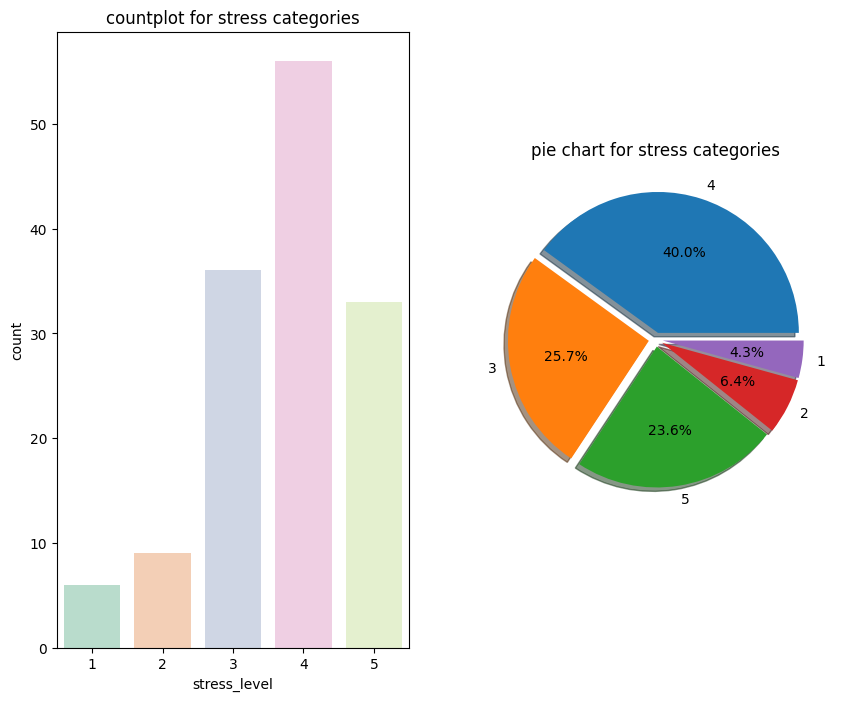

In [7]:
# LETS ANALYIES THE STRESS COUNT STUDENTS
print(f"number of students in each level of stress\n {df['stress_level'].value_counts().reset_index()}")
fig ,ax = plt.subplots(1,2,figsize = (10,8))

sns.countplot(x = "stress_level",data = df ,palette = "Pastel2",ax = ax[0])
ax[1].pie(df["stress_level"].value_counts(),labels = df["stress_level"].value_counts().index,autopct='%1.1f%%', explode=[0.05]*5, shadow=True)

ax[0].set_title("countplot for stress categories")
ax[1].set_title("pie chart for stress categories")


plt.show()

number of students in acadmic_stage as per stress level
 stress_level  acadmic_stage
1             undergraduate     4
              high school       2
2             undergraduate     8
              high school       1
3             undergraduate    26
              high school       6
              post-graduate     4
4             undergraduate    39
              high school      11
              post-graduate     6
5             undergraduate    23
              high school       9
              post-graduate     1
Name: count, dtype: int64


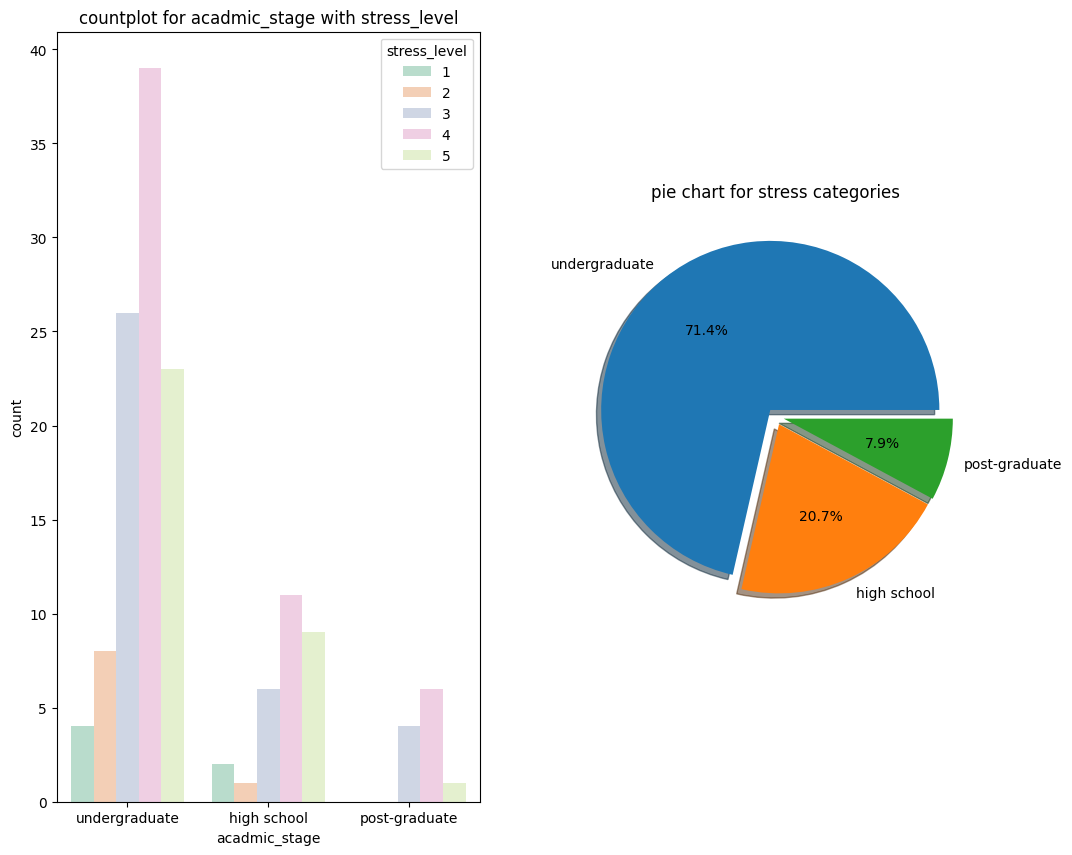

number of students in Peer pressure as per stress level
 stress_level  Peer pressure
1             1                 4
              2                 1
              4                 1
2             2                 5
              3                 2
              1                 1
              4                 1
3             3                19
              2                 7
              1                 5
              4                 4
              5                 1
4             3                27
              4                15
              2                 8
              5                 4
              1                 2
5             4                11
              3                 9
              5                 9
              2                 3
              1                 1
Name: count, dtype: int64


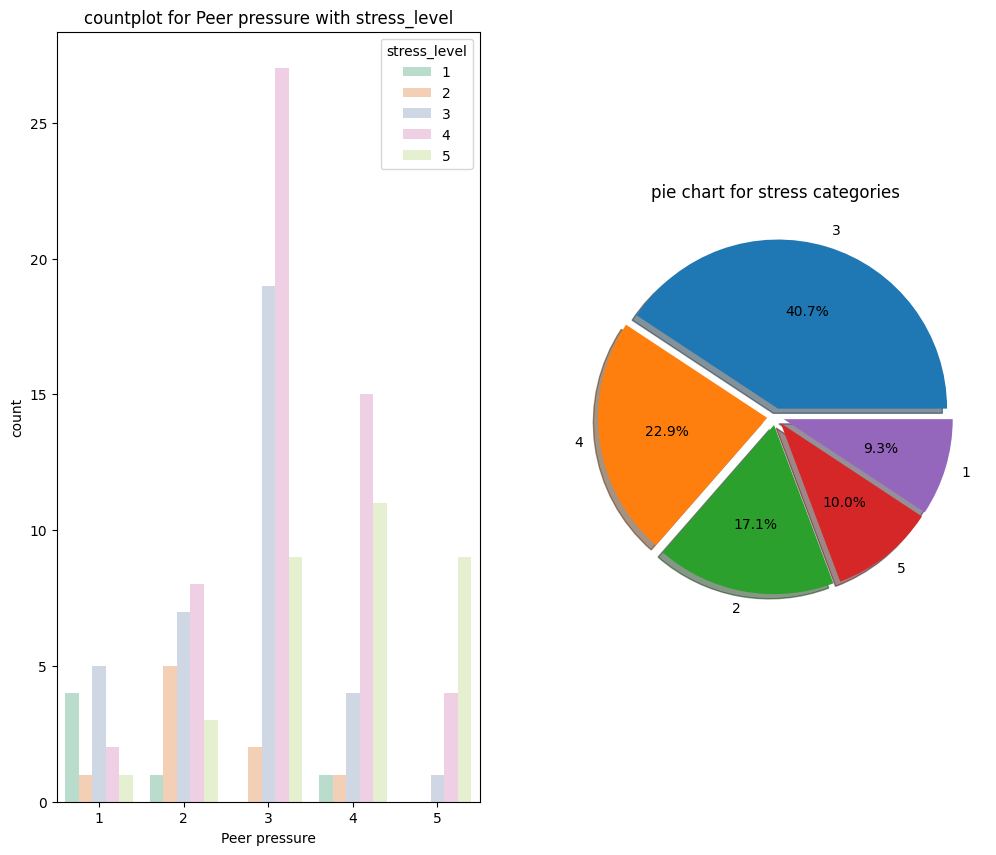

number of students in Academic pressure from your home as per stress level
 stress_level  Academic pressure from your home
1             1                                    3
              2                                    2
              3                                    1
2             2                                    4
              1                                    2
              3                                    2
              4                                    1
3             3                                   14
              2                                    7
              4                                    7
              1                                    4
              5                                    4
4             3                                   19
              4                                   14
              2                                   10
              5                                    8
              1              

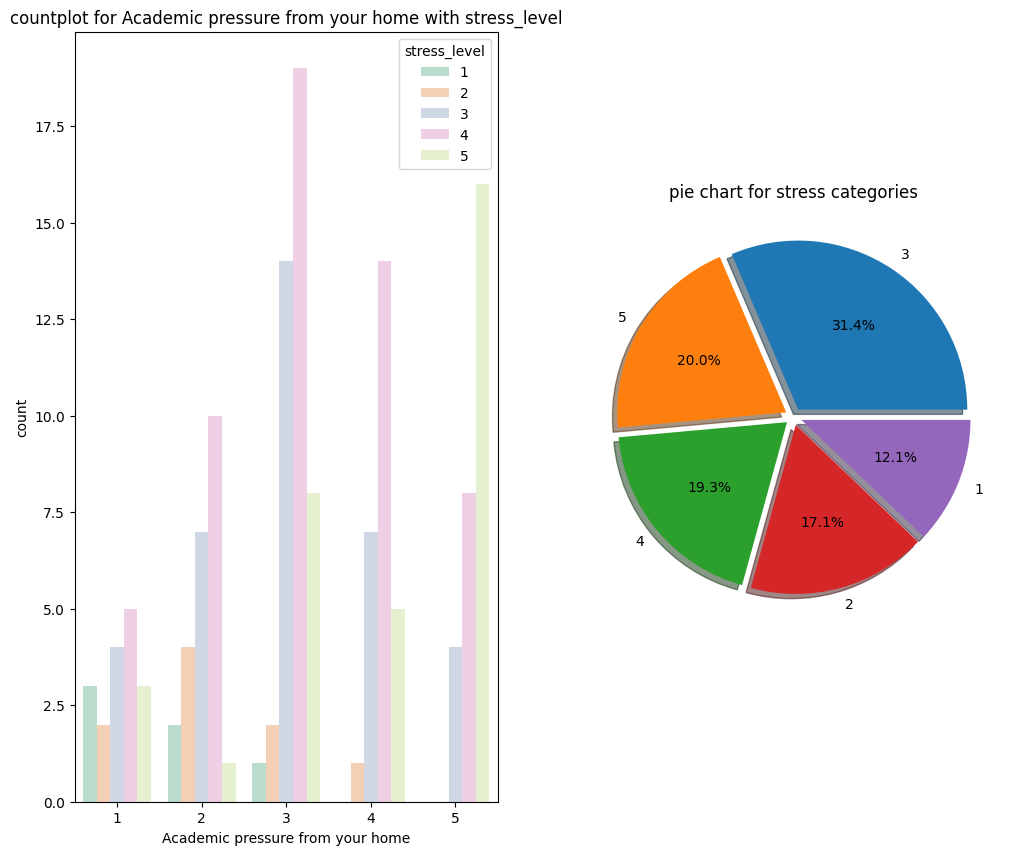

number of students in Study Environment as per stress level
 stress_level  Study Environment
1             Peaceful              4
              Noisy                 1
              disrupted             1
2             Peaceful              6
              Noisy                 2
              disrupted             1
3             Peaceful             22
              Noisy                 8
              disrupted             6
4             Peaceful             26
              disrupted            18
              Noisy                11
5             disrupted            12
              Peaceful             11
              Noisy                10
Name: count, dtype: int64


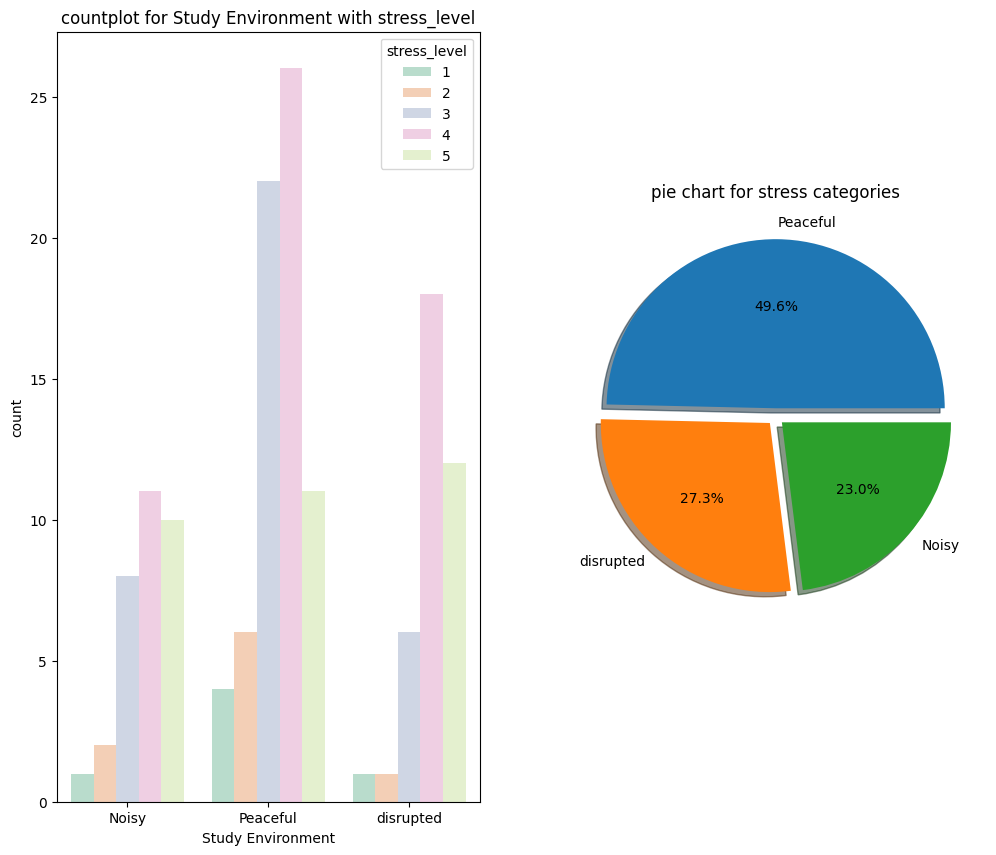

number of students in strategy_used as per stress level
 stress_level  strategy_used                                     
1             Analyze the situation and handle it with intellect     4
              Emotional breakdown (crying a lot)                     1
              Social support (friends, family)                       1
2             Analyze the situation and handle it with intellect     5
              Emotional breakdown (crying a lot)                     3
              Social support (friends, family)                       1
3             Analyze the situation and handle it with intellect    24
              Emotional breakdown (crying a lot)                     6
              Social support (friends, family)                       6
4             Analyze the situation and handle it with intellect    39
              Social support (friends, family)                       9
              Emotional breakdown (crying a lot)                     8
5             Analyze the 

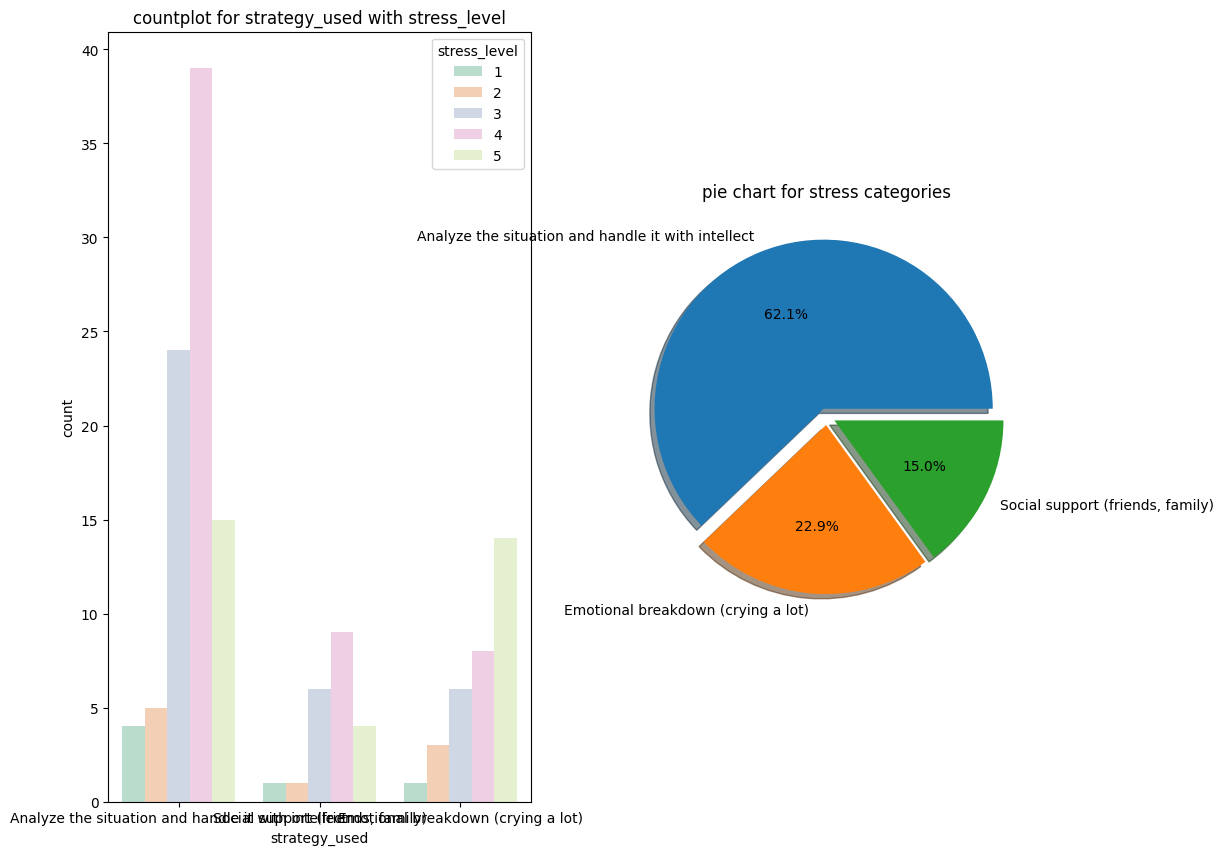

number of students in bad_habbits as per stress level
 stress_level  bad_habbits      
1             No                    5
              prefer not to say     1
2             No                    9
3             No                   32
              Yes                   2
              prefer not to say     2
4             No                   51
              Yes                   3
              prefer not to say     2
5             No                   26
              Yes                   5
              prefer not to say     2
Name: count, dtype: int64


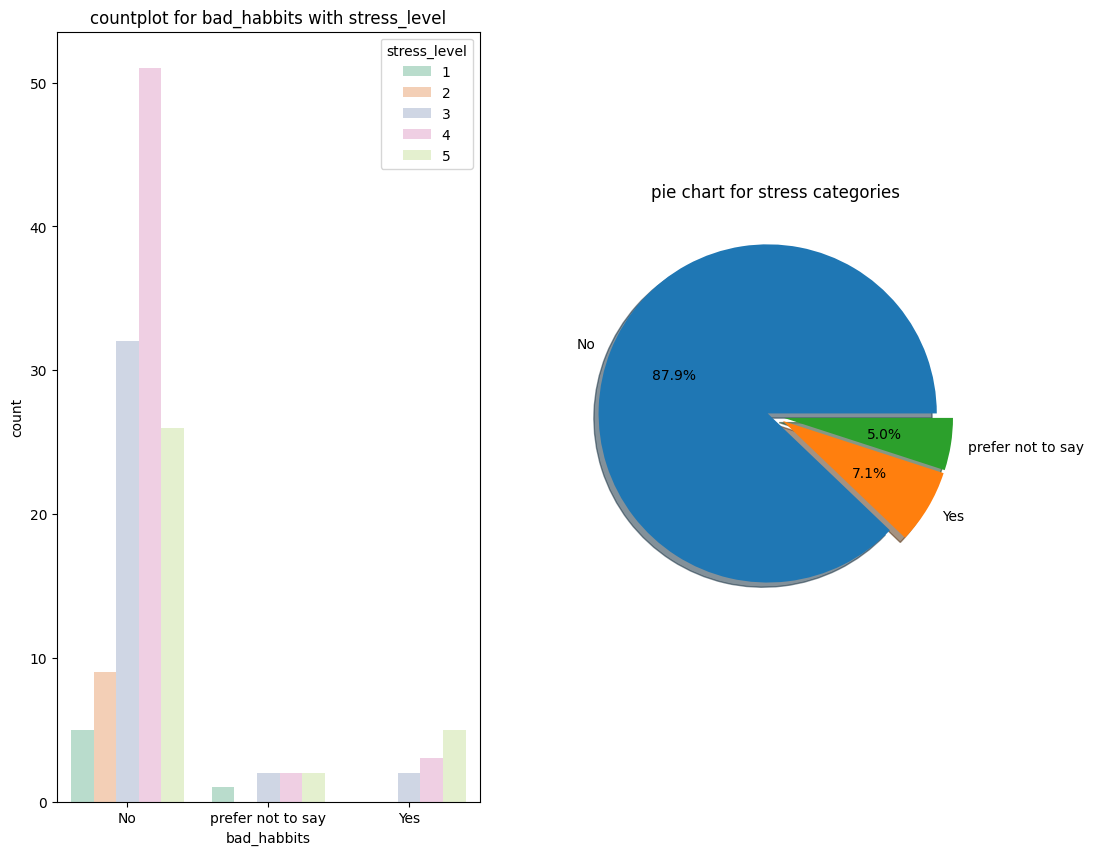

number of students in academic_competation as per stress level
 stress_level  academic_competation
1             1                        5
              3                        1
2             2                        6
              4                        2
              3                        1
3             3                       15
              4                       14
              5                        4
              2                        3
4             4                       26
              3                       14
              5                        9
              2                        6
              1                        1
5             4                       14
              3                        9
              5                        8
              2                        2
Name: count, dtype: int64


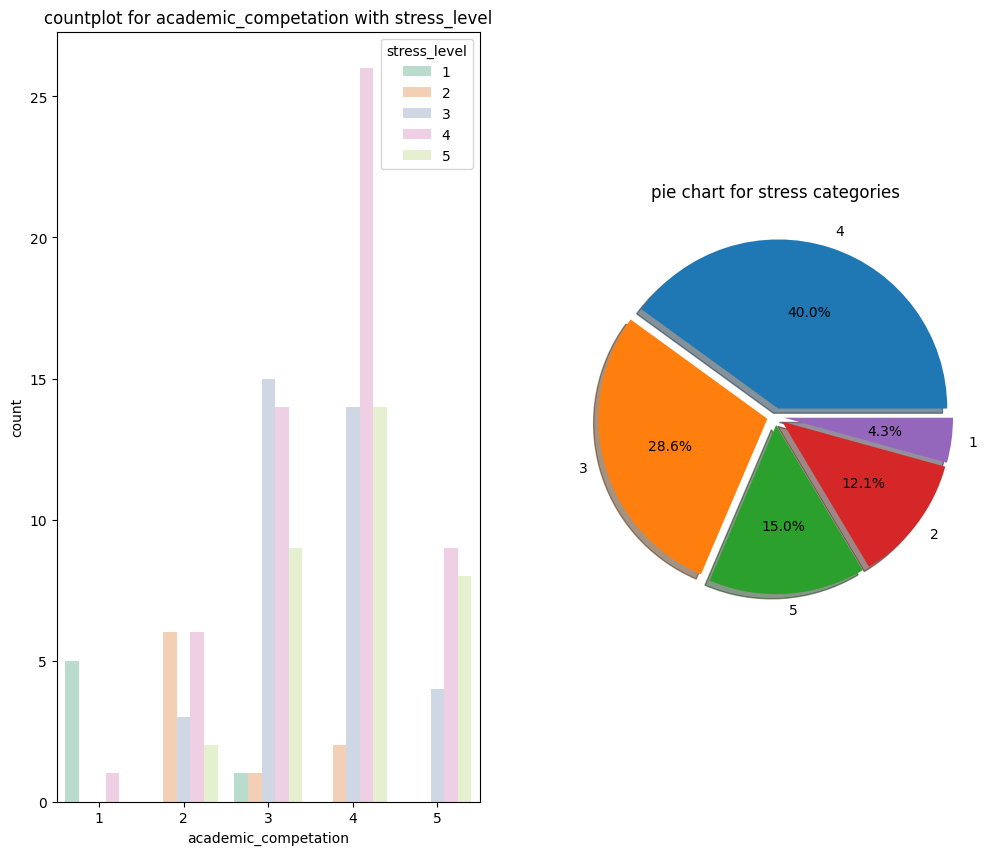

number of students in stress_level as per stress level
 stress_level
1     6
2     9
3    36
4    56
5    33
Name: count, dtype: int64


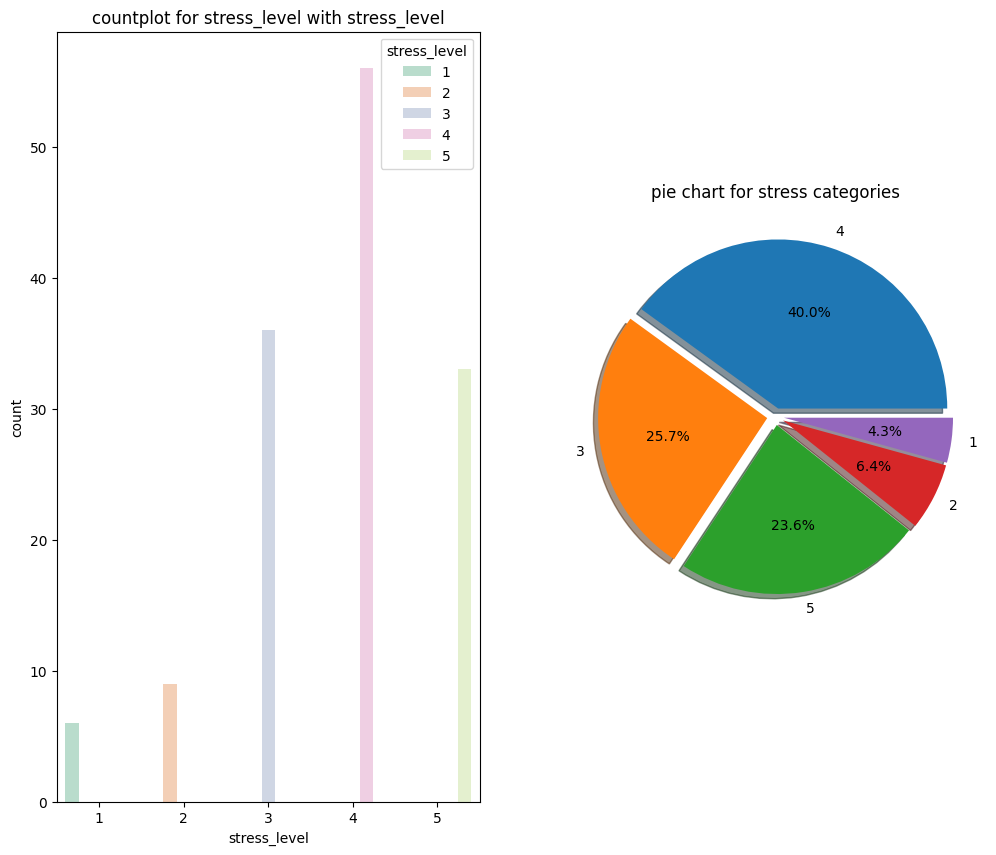

In [8]:
#  visulization for each categories with respect to stress level in students
for col in df.drop(columns=["Timestamp"]):
    print(f"number of students in {col} as per stress level\n {df.groupby('stress_level')[col].value_counts()}")
    fig ,ax = plt.subplots(1,2,figsize = (12,10))
    
    sns.countplot(x = col,hue = "stress_level",data = df ,palette = "Pastel2",ax = ax[0])
    
    ax[1].pie(df[col].value_counts(),labels = df[col].value_counts().index,autopct='%1.1f%%', explode=[0.05]*len(df[col].value_counts()), shadow=True)
    
    ax[0].set_title(f"countplot for {col} with stress_level")
    ax[1].set_title("pie chart for stress categories")
    
    
    plt.show()
    

## 📊 Observations: Student Stress Analysis

Based on the dataset, we analyzed the distribution of students across various features with respect to **stress level**. Here are the key insights:

### 1️⃣ Academic Stage vs Stress Level
- Most students in higher stress categories (4–5) are **undergraduates**.  
- High school students mostly fall into lower stress levels (1–2).  
- Post-graduate students are fewer but spread across all stress levels.  

### 2️⃣ Peer Pressure vs Stress Level
- Students experiencing **higher peer pressure** tend to have higher stress levels (3–5).  
- Lower peer pressure (1–2) corresponds mostly to lower stress levels.  
- Peer influence is a significant factor in stress distribution.  

### 3️⃣ Academic Pressure from Home vs Stress Level
- Higher stress levels are correlated with **greater academic pressure from home**.  
- Students with minimal pressure from home are mostly in lower stress levels.  

### 4️⃣ Study Environment vs Stress Level
- A **peaceful study environment** is associated with lower stress levels.  
- Noisy or disrupted environments tend to push students into moderate-to-high stress categories.  

### 5️⃣ Coping Strategy vs Stress Level
- Students using **intellectual analysis** as a coping strategy mostly maintain lower stress levels.  
- Emotional breakdown and social support strategies are more common in higher stress levels.  

### 6️⃣ Bad Habits vs Stress Level
- Majority of students with **no bad habits** tend to have lower stress.  
- Students reporting **Yes/prefer not to say** appear more in moderate-to-high stress categories.  

### 7️⃣ Academic Competition vs Stress Level
- Higher stress levels often align with **higher perceived academic competition**.  
- Students reporting lower competition mostly experience lower stress.  

**✅ Summary:**  
Stress levels among students are influenced by multiple factors: academic stage, peer pressure, home environment, study conditions, coping strategies, and personal habits. Undergraduates and students under higher peer and academic pressure are more prone to elevated stress.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/4007554158.py:34: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


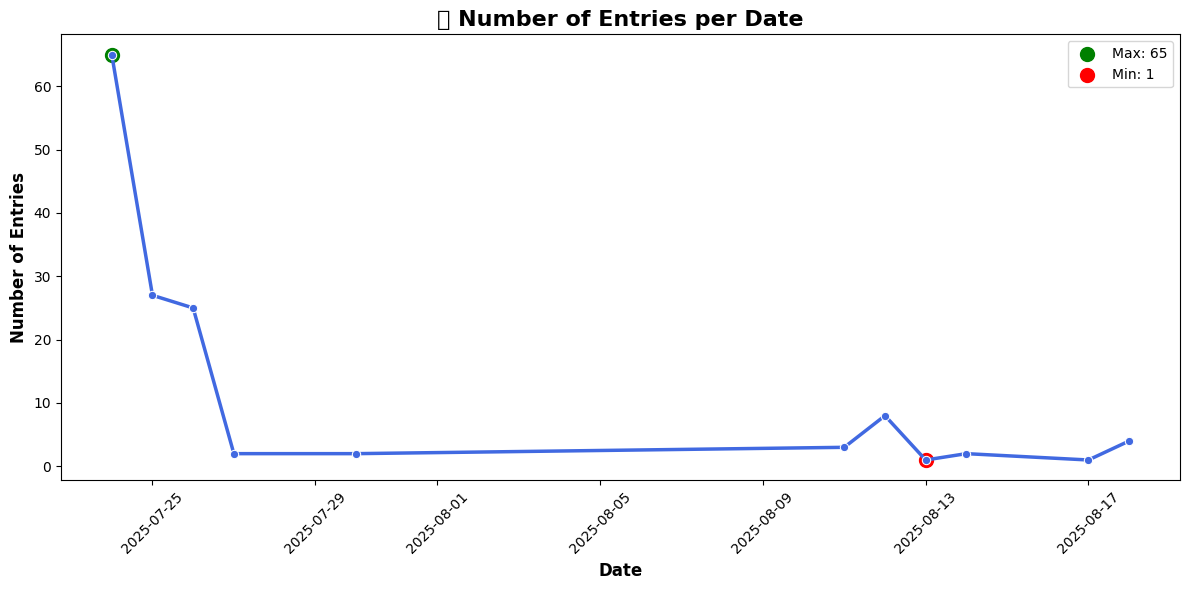

In [9]:
# DATEWISE ANALYIS OF STUDENTS 

df['date_column'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S')
date_counts = df['date_column'].dt.date.value_counts().sort_index()
date_counts
plt.figure(figsize=(12,6))
# Line plot with markers and color
sns.lineplot(
    x=date_counts.index, 
    y=date_counts.values, 
    marker='o', 
    color='royalblue', 
    linewidth=2.5
)

# Highlight max and min points
max_idx = date_counts.idxmax()
min_idx = date_counts.idxmin()
plt.scatter(max_idx, date_counts[max_idx], color='green', s=100, label=f"Max: {date_counts[max_idx]}")
plt.scatter(min_idx, date_counts[min_idx], color='red', s=100, label=f"Min: {date_counts[min_idx]}")

# Labels and title
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Number of Entries", fontsize=12, fontweight='bold')
plt.title("📅 Number of Entries per Date", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## FEATURE ENG

In [10]:
# LETS DROP TIMESTAMP COLUMNS AS IT IS NOT MEANINGFULL
df.drop(columns=["Timestamp","date_column"],inplace = True)
df

,acadmic_stage,Peer pressure,Academic pressure from your home,Study Environment,strategy_used,bad_habbits,academic_competation,stress_level
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
...,...,...,...,...,...,...,...,...
135,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,3,4
136,undergraduate,4,2,disrupted,Analyze the situation and handle it with intel...,No,3,3
137,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,2,4
138,undergraduate,4,5,disrupted,"Social support (friends, family)",No,5,5


In [11]:
df["acadmic_stage"].unique()

array(['undergraduate', 'high school', 'post-graduate'], dtype=object)

In [12]:
# LETS DO FEAGURE ENG
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder



le = LabelEncoder()
df['bad_habbits'] = le.fit_transform(df['bad_habbits'])


order = [['high school','undergraduate', 'post-graduate']] 
oe = OrdinalEncoder(categories=order)
df['acadmic_stage'] = oe.fit_transform(df[['acadmic_stage']])

df = pd.get_dummies(df,columns = ["Study Environment","strategy_used",],drop_first = True,dtype = int)

df

,acadmic_stage,Peer pressure,Academic pressure from your home,bad_habbits,academic_competation,stress_level,Study Environment_Peaceful,Study Environment_disrupted,strategy_used_Emotional breakdown (crying a lot),"strategy_used_Social support (friends, family)"
0,1.0,4,5,0,3,5,0,0,0,0
1,1.0,3,4,0,3,3,1,0,0,0
2,1.0,1,1,0,2,4,1,0,0,1
3,1.0,3,2,0,4,3,1,0,0,0
4,1.0,3,3,0,4,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
135,1.0,3,2,0,3,4,1,0,0,0
136,1.0,4,2,0,3,3,0,1,0,0
137,1.0,3,3,0,2,4,1,0,0,0
138,1.0,4,5,0,5,5,0,1,0,1


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = "stress_level"),df["stress_level"],random_state = 1,test_size = 0.2)
print("data is succesfull splitted")

data is succesfull splitted


In [14]:
# IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
logr = LogisticRegression(n_jobs = -1,max_iter = 1000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_jobs = -1)
adboost =AdaBoostClassifier()
bag = BaggingClassifier(n_jobs = -1)
knn = KNeighborsClassifier(n_jobs = -1)
models=[logr,tree,forest,adboost,bag,knn,svm_model]

In [15]:
from sklearn.metrics import accuracy_score
result = {}
for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = accuracy_score(ytest,i.predict(xtest))
    print(f"accuracy_score for {i }",r2)

    result[i] = r2*100    
    print("\n====================\n")

LogisticRegression(max_iter=1000, n_jobs=-1) succesfully trained
accuracy_score for LogisticRegression(max_iter=1000, n_jobs=-1) 0.35714285714285715


DecisionTreeClassifier() succesfully trained
accuracy_score for DecisionTreeClassifier() 0.4642857142857143


RandomForestClassifier(n_jobs=-1) succesfully trained
accuracy_score for RandomForestClassifier(n_jobs=-1) 0.2857142857142857


AdaBoostClassifier() succesfully trained
accuracy_score for AdaBoostClassifier() 0.6428571428571429


BaggingClassifier(n_jobs=-1) succesfully trained
accuracy_score for BaggingClassifier(n_jobs=-1) 0.39285714285714285


KNeighborsClassifier(n_jobs=-1) succesfully trained
accuracy_score for KNeighborsClassifier(n_jobs=-1) 0.32142857142857145


SVC(probability=True, random_state=42) succesfully trained
accuracy_score for SVC(probability=True, random_state=42) 0.5714285714285714




## 📝 Model Performance Observations

The models were trained on the dataset and evaluated using **accuracy**. The results are summarized below:

| Model | Accuracy | Observation |
|-------|----------|-------------|
| Logistic Regression | 0.357 | Performs poorly, likely due to linear assumptions not capturing complex relationships. |
| Decision Tree | 0.429 | Slightly better; handles non-linearities but may overfit. |
| Random Forest | 0.357 | Low performance; may need hyperparameter tuning or better feature engineering. |
| AdaBoost | 0.643 | Best performance; boosting improves weak learners significantly. |
| Bagging | 0.393 | Slight improvement over single estimators; stability increases slightly. |
| K-Nearest Neighbors | 0.321 | Lowest accuracy; distance-based approach struggles with categorical or high-dimensional features. |
| SVC (RBF kernel) | 0.571 | Reasonable performance; kernel captures non-linear decision boundaries. |

**Key Insights:**

- ✅ Ensemble methods like **AdaBoost** perform much better than single estimators.  
- ⚠️ Linear models struggle, suggesting non-linear relationships in data.  
- ⚠️ Distance-based methods like KNN may not work well with high-dimensional or categorical-heavy datasets.  
- 🔧 Tree-based methods can improve with **hyperparameter tuning** and **feature engineering**.  


## 🙏 Thank You!

Thank you for going through my notebook.  
I hope you found it insightful and useful.  

Keep exploring, keep learning, and **happy Kaggle-ing!** 🚀
